# FFT analysis

> FFT Examples

- skip_showdoc: true
- skip_exec: true

In [ ]:
import pywt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('<file')

In [ ]:
cycles = 26
weeks = cycles * 2
resolution = 7


np.random.seed(0)
t = np.linspace(0, cycles * np.pi, weeks * resolution)

waveform = np.random.normal(scale=0.5, size=len(t)) + 0.5 * np.sign(np.sin(0.67 * t))
y = np.sin(t) + 0.3*np.sin(4.71*t) + waveform

In [ ]:
# Create a Pandas DataFrame
df = pd.DataFrame({'y': y})
df['unique_id'] = 1

In [ ]:
rng = pd.date_range('04/01/2021', periods=df.shape[0], freq='D')
df['ds'] = rng
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   y          364 non-null    float64       
 1   unique_id  364 non-null    int64         
 2   ds         364 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


In [ ]:
df_plot = df.copy()
df_plot.rename(columns={'y': 'final'}, inplace=True)
df_plot['unique_id'] = 'final'
df_plot['first'] = np.sin(t)
df_plot['second'] = 0.3*np.sin(5*t)
df_plot['noise'] = np.random.normal(scale=0.2, size=len(t))
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   final      364 non-null    float64       
 1   unique_id  364 non-null    object        
 2   ds         364 non-null    datetime64[ns]
 3   first      364 non-null    float64       
 4   second     364 non-null    float64       
 5   noise      364 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 17.2+ KB


In [ ]:
import altair as alt

def long_form(df_plot):
    return df_plot.melt('ds', var_name='unique_id', value_name='price')

def altair_plot(df_plot): 
    highlight = alt.selection_point(on='mouseover', fields=['unique_id'], nearest=True)

    base = alt.Chart(df_plot).encode(
        x='ds:T',
        y='price:Q',
        color='unique_id:N'
    )

    points = base.mark_circle().encode(
        opacity=alt.value(0)
    ).add_params(
        highlight
    ).properties(
        width=1000
    )

    lines = base.mark_line().encode(
        size=alt.condition(~highlight, alt.value(1), alt.value(3))
    )

    return points + lines

df_plot = long_form(df_plot)
altair_plot(df_plot)

alt.LayerChart(...)

In [ ]:
def wavelet_transform(data):
    transformed_data = []
    for column in data.columns:
        coeffs = pywt.wavedec(data[column], wavelet='db5', level=5)
        print(coeffs)
        transformed_data.extend(coeffs)
        
    return transformed_data

In [ ]:
y = pd.DataFrame(df['y'])
#y['second'] = waveform
y.columns

Index(['y'], dtype='object')

In [ ]:
X_wavelet = wavelet_transform(y)

[array([ 8.56037363,  8.28015354,  8.60255108,  8.33149856,  8.73389978,
        7.74524132, 10.2828375 ,  2.1141299 , -1.18795588,  0.44417908,
        1.19875776,  0.03718912, -0.69022103,  0.39696723, -0.92086484,
        0.09806285, -0.67200673,  0.71120904, -4.05185514, -4.04591833]), array([ 0.01153199, -0.25139026,  0.08876349,  1.32828559,  0.07565752,
        2.63863482,  4.79537636, -1.24767023, -5.54718816, -3.35555816,
        2.36944361,  4.04646868,  0.87187567, -1.68265763,  1.33179388,
       -0.40272217,  0.55708821, -1.64304018,  2.00581003, -2.03032757]), array([-0.08897953, -0.4812266 , -0.50538909, -0.10168253, -2.61150232,
        2.9547261 , -2.29803229, -0.09763533,  1.47903615, -2.54419368,
        3.62531102, -2.47650808,  2.5678546 , -1.85454489, -0.19285758,
        1.37250574, -1.5142747 ,  2.39190732, -3.19870564,  2.72915131,
       -3.41889537,  1.28809091,  0.52633798, -1.98882932,  3.88974806,
       -5.33502469,  0.91456006,  0.25339818,  3.80649291, 

In [ ]:
X_wavelet[0]

array([ 1.69782638e+00,  2.86633130e+00,  2.19476886e+00,  1.17397138e+00,
        2.01586836e+00,  2.70074412e+00,  1.98287045e+00,  2.53977548e+00,
        1.91548731e+00,  2.07104557e+00,  1.49206799e+00,  6.24585355e-01,
        3.63488119e-03, -1.23050798e+00, -2.22516777e+00, -1.45626892e+00,
       -1.57360056e+00, -6.70425537e-01,  3.60216320e-01,  3.92006830e-01,
       -6.67448566e-01,  1.20076474e+00,  1.34902772e+00, -8.80108851e-01,
       -8.48793754e-01,  9.86961240e-01, -1.00889684e+00, -9.96228925e-01,
       -7.58473590e-01, -1.09936767e+00, -4.74542101e-01,  1.07154093e+00,
        6.71358965e-01,  1.41619721e+00,  1.77307686e+00,  7.40809286e-02,
        5.62297202e-02,  1.48342153e-02, -7.92568112e-01, -6.72164798e-01,
       -1.47818506e+00, -2.98386840e+00, -2.19059661e+00, -1.95613078e+00,
       -2.01711333e+00, -7.02480981e-04,  2.58409010e+00,  1.03976676e+00,
        2.38187317e+00,  2.73694743e+00,  1.94806995e+00,  2.13110002e+00,
        1.41275222e+00,  

[<matplotlib.lines.Line2D>]

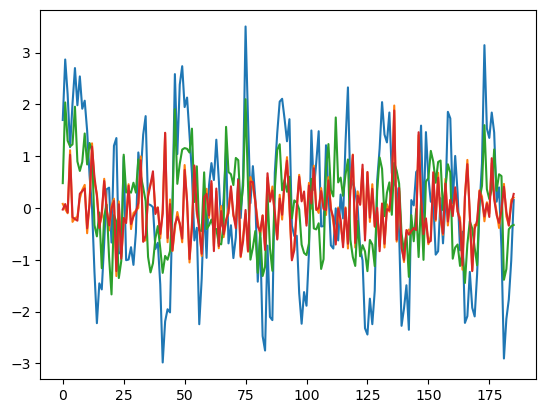

In [ ]:
plt.plot(X_wavelet[0])
plt.plot(X_wavelet[1])
plt.plot(X_wavelet[2])
plt.plot(X_wavelet[3])

In [ ]:
X_wavelet

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [ ]:
split_point = int(len(data) * 0.8)

NameError: name 'data' is not defined

In [ ]:
X_train, X_data = X_wavelet[:split_point], X_wavelet[split_point:, :]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)